# Exploratory Data Analysis 
of the classic Kaggle Titanic data

In [3]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
notebook_dir = os.getcwd()  # Get the current working directory
project_dir = os.path.dirname(notebook_dir)  # Go one level up to the project directory
data_path = os.path.join(project_dir, "data", "raw", "train.csv")

# Load the Titanic training data
titanic_data = pd.read_csv(data_path)

In [8]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

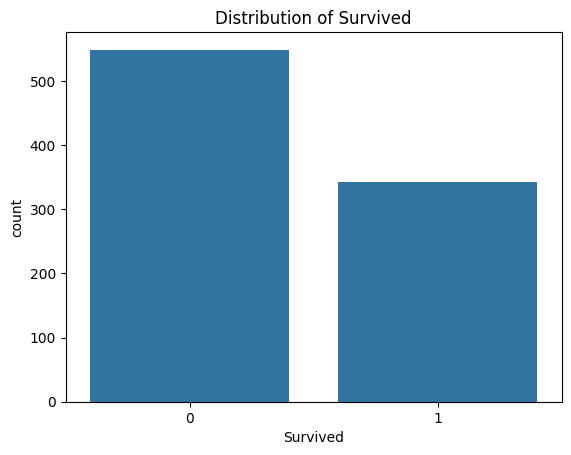

In [11]:
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survived')
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

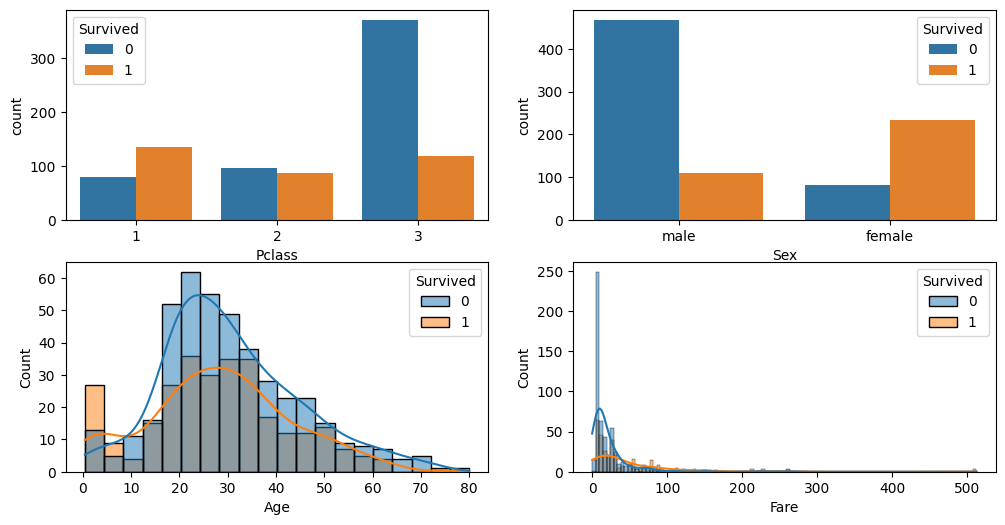

In [14]:
plt.figure(figsize=(12, 6))

# Pclass vs. Survived
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

# Sex vs. Survived
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

# Age vs. Survived
plt.subplot(2, 2, 3)
sns.histplot(x='Age', hue='Survived', data=titanic_data, kde=True)

# Fare vs. Survived
plt.subplot(2, 2, 4)
sns.histplot(x='Fare', hue='Survived', data=titanic_data, kde=True)


In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

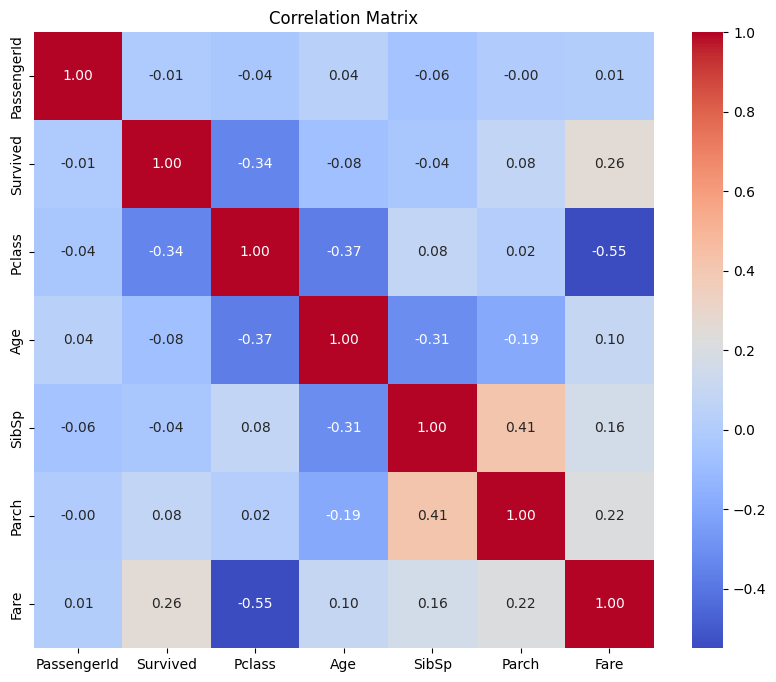

In [17]:
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
# Assuming 'titanic_data' is your DataFrame
# Apply one-hot encoding to the 'Embarked' and 'Sex' columns
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Embarked', 'Sex'], drop_first=False)



In [26]:
titanic_data_encoded.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [27]:
titanic_data_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,False,True,False,True


In [28]:
titanic_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
titanic_data_encoded['Embarked_C']

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Name: Embarked_C, Length: 891, dtype: bool